In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
import warnings
warnings.simplefilter("ignore")

In [23]:
df = pd.read_csv("train.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN04969,2,1,1,0,Meal Plan 1,0,Room_Type 1,3,2017,8,23,Online,0,0,0,90.00,3,Not_Canceled
1,INN34541,2,0,1,2,Meal Plan 1,0,Room_Type 4,9,2018,2,12,Offline,0,0,0,48.67,0,Not_Canceled
2,INN36109,2,0,2,2,Meal Plan 1,0,Room_Type 1,24,2018,12,25,Online,0,0,0,95.20,1,Not_Canceled
3,INN01554,2,0,0,3,Meal Plan 1,0,Room_Type 1,23,2018,6,21,Online,0,0,0,127.67,0,Canceled
4,INN24975,2,1,0,2,Meal Plan 1,0,Room_Type 4,9,2018,9,8,Online,0,0,0,201.50,2,Not_Canceled


In [24]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [25]:
df.drop(columns=['Booking_ID'] , inplace=True)

In [26]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,1,0,Meal Plan 1,0,Room_Type 1,3,2017,8,23,Online,0,0,0,90.00,3,Not_Canceled
1,2,0,1,2,Meal Plan 1,0,Room_Type 4,9,2018,2,12,Offline,0,0,0,48.67,0,Not_Canceled
2,2,0,2,2,Meal Plan 1,0,Room_Type 1,24,2018,12,25,Online,0,0,0,95.20,1,Not_Canceled
3,2,0,0,3,Meal Plan 1,0,Room_Type 1,23,2018,6,21,Online,0,0,0,127.67,0,Canceled
4,2,1,0,2,Meal Plan 1,0,Room_Type 4,9,2018,9,8,Online,0,0,0,201.50,2,Not_Canceled


In [27]:
df.shape

(29020, 18)

In [28]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [29]:
df.duplicated().sum()

np.int64(7692)

In [30]:
df.drop_duplicates(inplace=True)

In [31]:
df.shape

(21328, 18)

In [32]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [33]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    15175
Canceled         6153
Name: count, dtype: int64

###### Our data is imbalanced

In [34]:
cat_cols = ['type_of_meal_plan','required_car_parking_space',
       'room_type_reserved','market_segment_type', 'repeated_guest','booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

### DATA ANALYSIS

In [35]:
data = df.copy()

In [36]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,1,0,Meal Plan 1,0,Room_Type 1,3,2017,8,23,Online,0,0,0,90.00,3,Not_Canceled
1,2,0,1,2,Meal Plan 1,0,Room_Type 4,9,2018,2,12,Offline,0,0,0,48.67,0,Not_Canceled
2,2,0,2,2,Meal Plan 1,0,Room_Type 1,24,2018,12,25,Online,0,0,0,95.20,1,Not_Canceled
3,2,0,0,3,Meal Plan 1,0,Room_Type 1,23,2018,6,21,Online,0,0,0,127.67,0,Canceled
4,2,1,0,2,Meal Plan 1,0,Room_Type 4,9,2018,9,8,Online,0,0,0,201.50,2,Not_Canceled


##### UNIVARIATE ANALYSIS

In [37]:
def num_plot_dist(df , num_features):
    fig , axes = plt.subplots(len(num_features),2,figsize=(15,len(num_features)*5))
    if len(num_features)==1:
        axes=[axes]
    
    for i,column in enumerate(num_features):
        sns.histplot(data=df , x=column , ax=axes[i][0] , kde=True , palette="Blues" )
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df , x=column , ax=axes[i][1] , palette="Blues")
        axes[i][1].set_title(f"Box Plot for {column}")
    
    plt.tight_layout()
    plt.show()

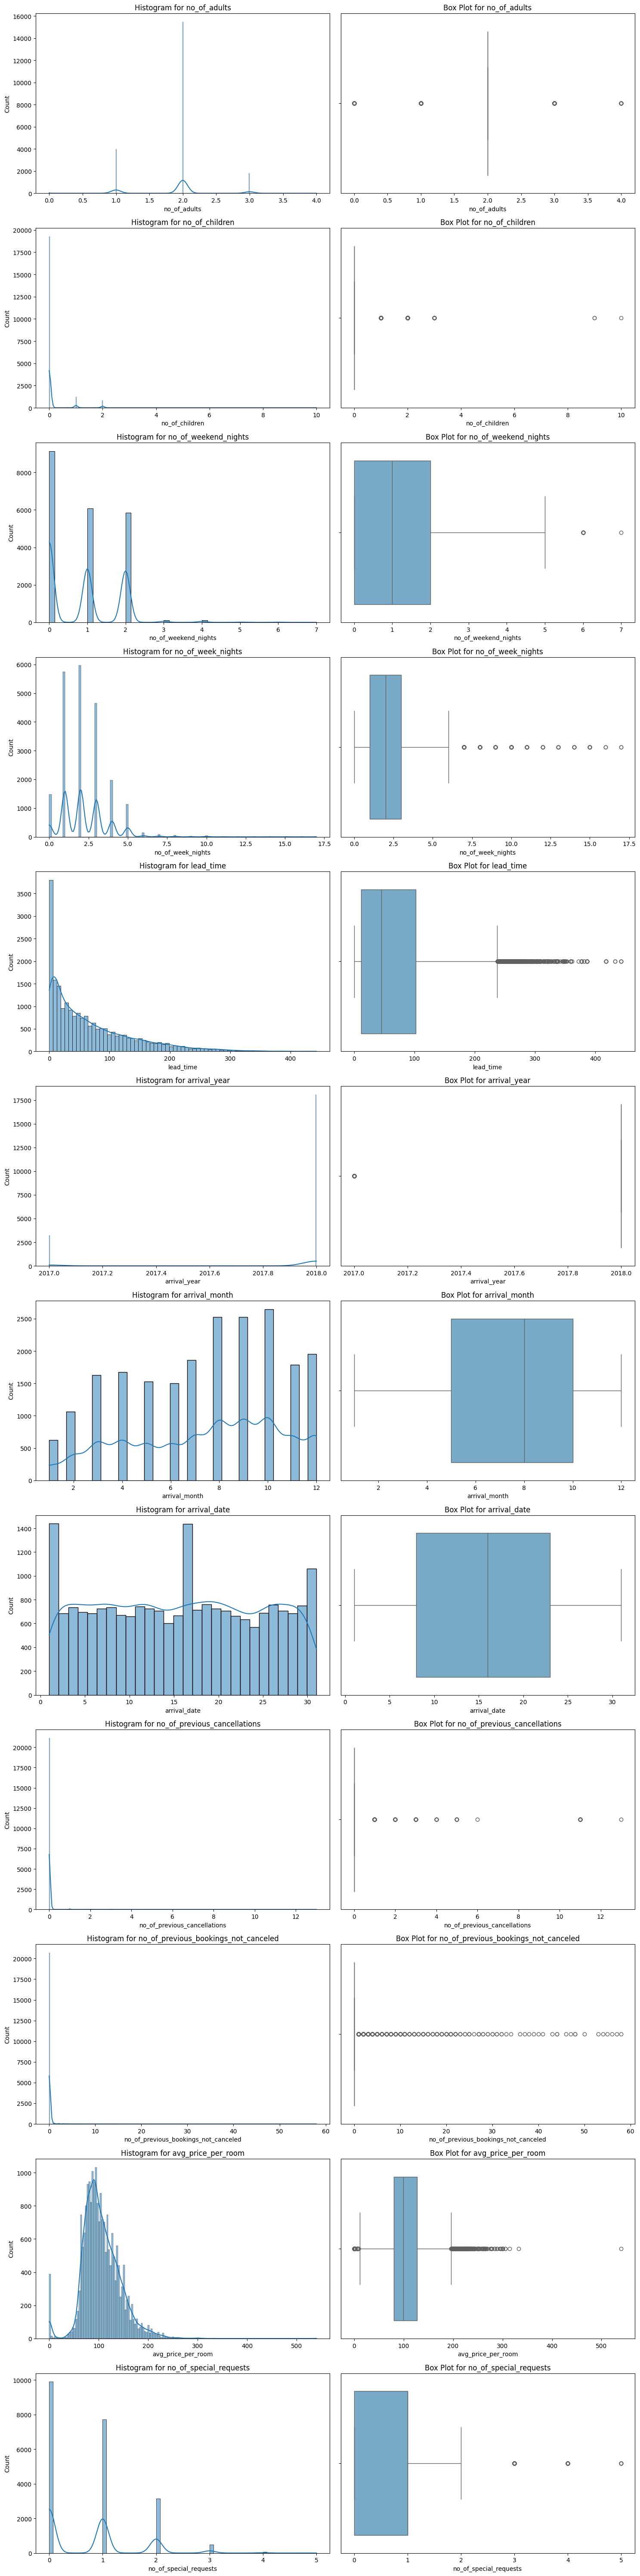

In [38]:
num_plot_dist(data , num_cols)

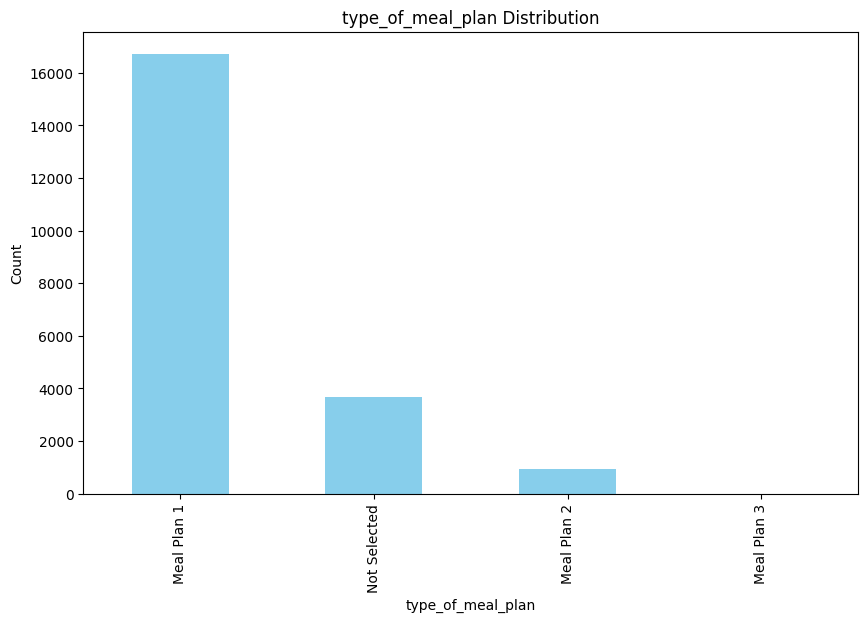

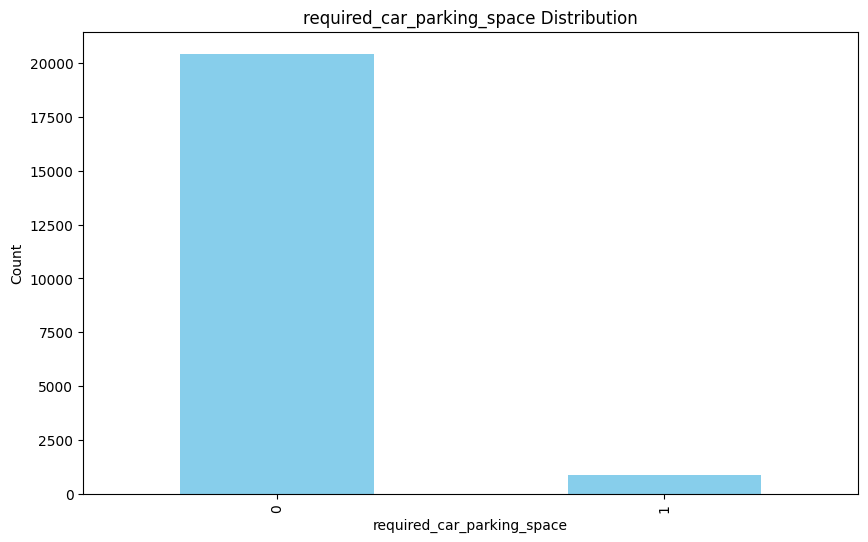

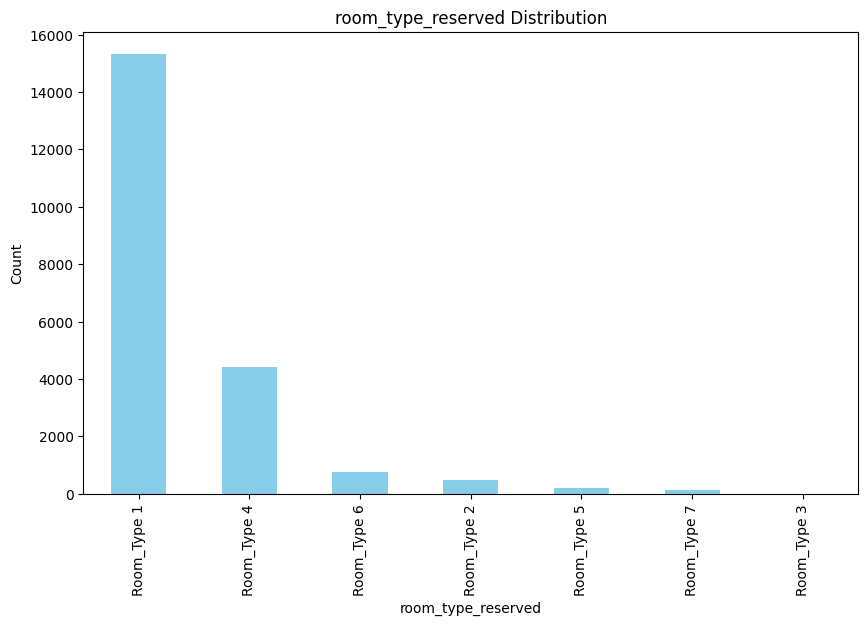

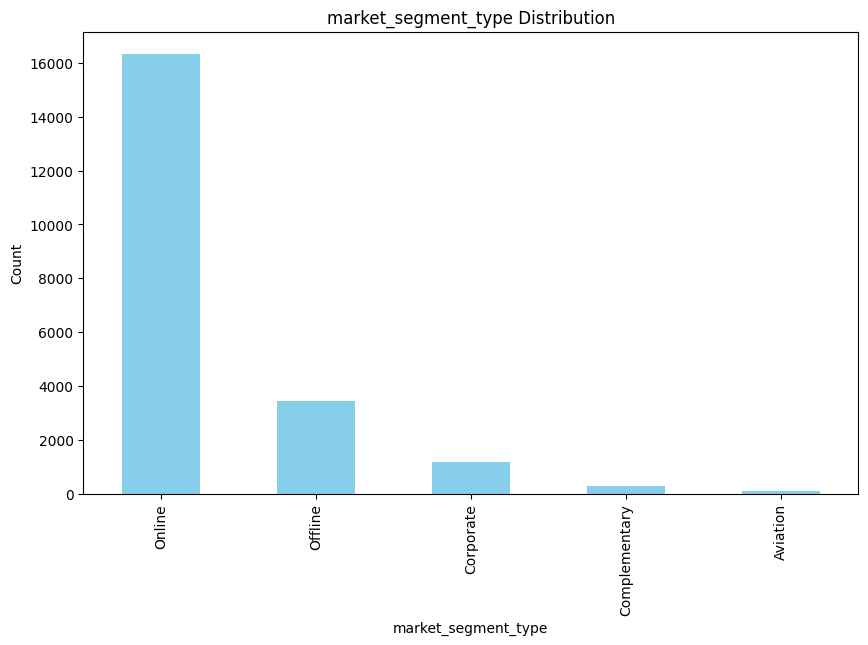

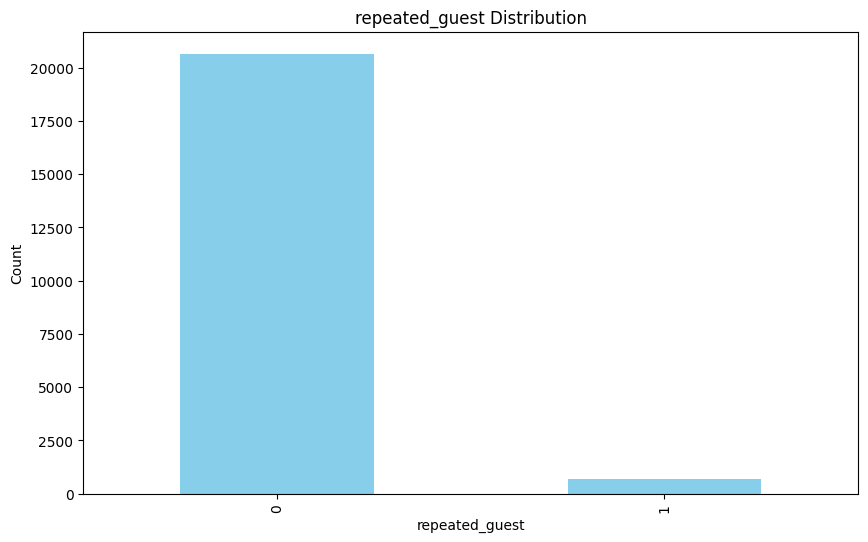

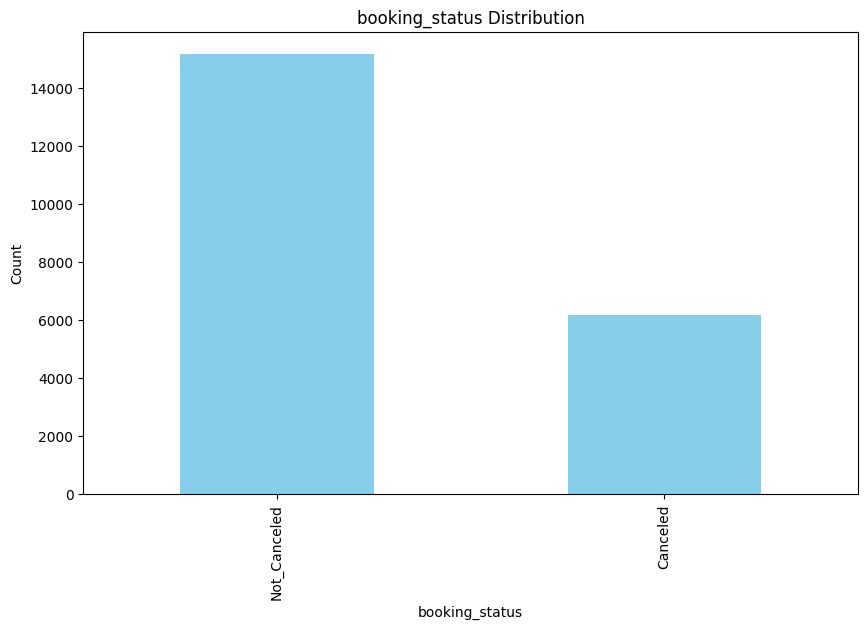

In [39]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar' , color='skyblue')
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

#### Bivaraite Analysis

In [40]:
def plot_bivariate_num(df , target , num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i , column in enumerate(num_features):
        sns.boxplot(x=target,y=column,ax=axes[i] , data=df , palette="Blues")
        axes[i].set_title(f"{column}  VS {target}")

    plt.tight_layout()
    plt.show()

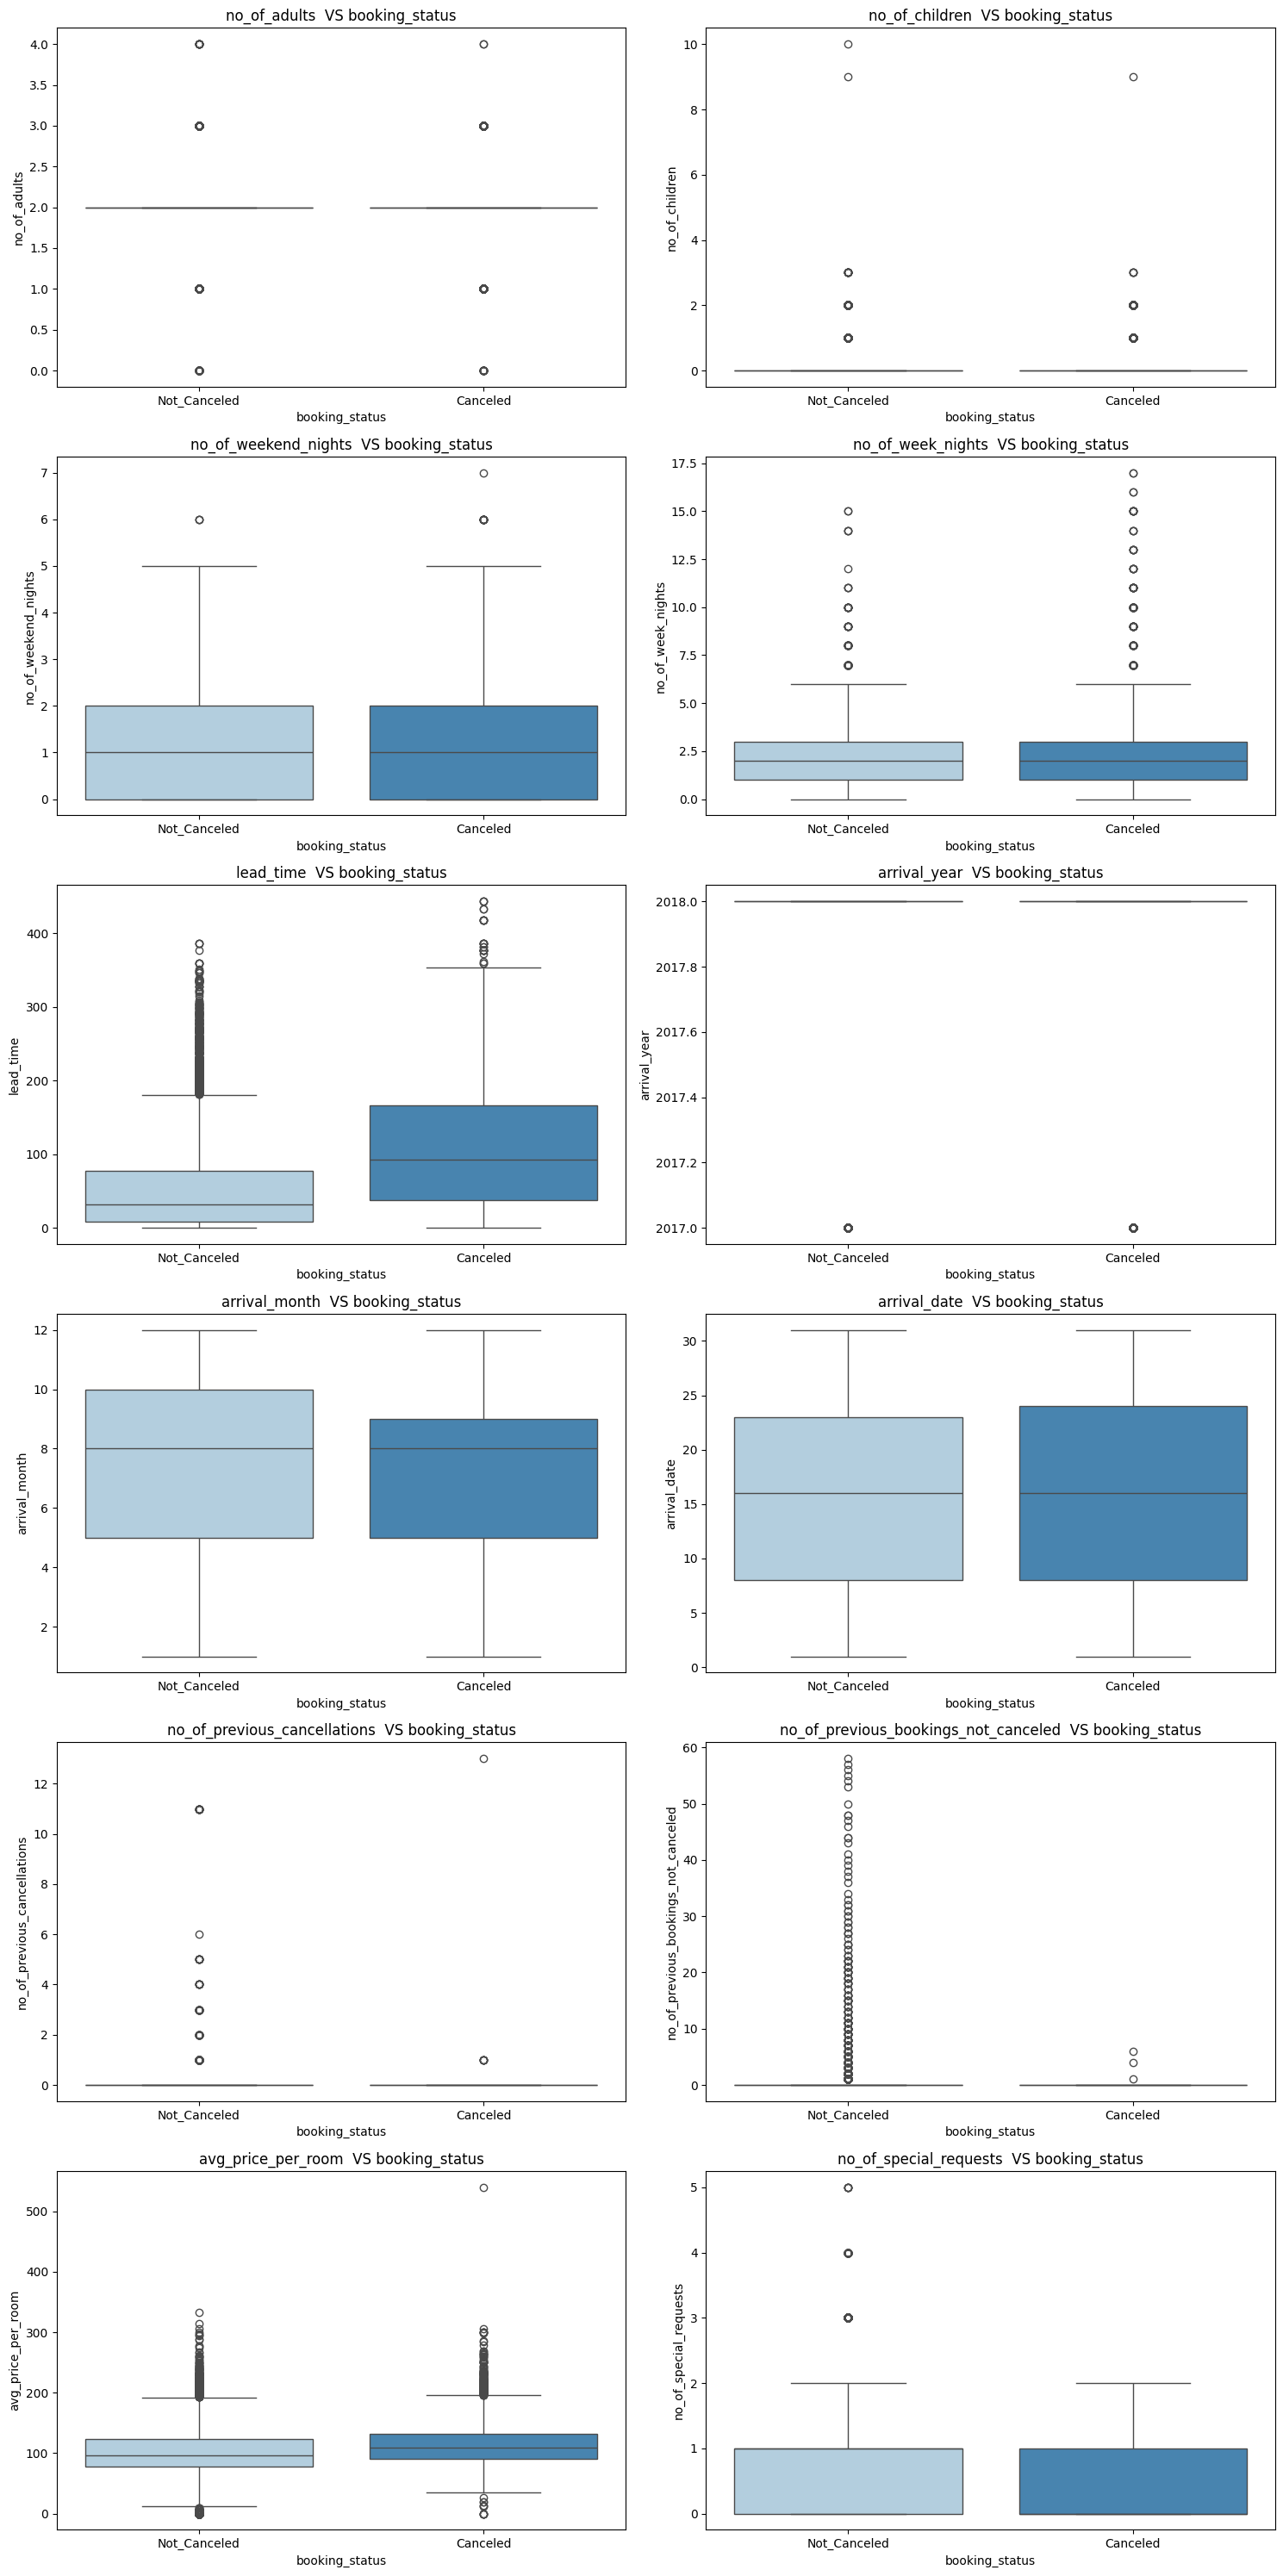

In [41]:
plot_bivariate_num(data , 'booking_status' , num_cols)

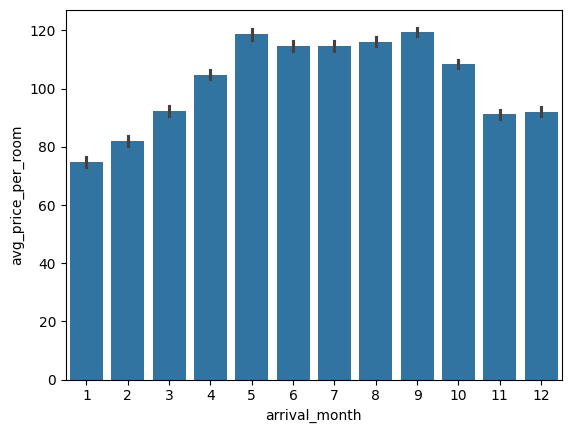

In [42]:
sns.barplot(x='arrival_month' , y="avg_price_per_room" , data=data)
plt.show()

In [43]:
def plot_bivaraite_cat(df , target , cat_features):

    num_features = len(cat_features)
    num_rows = (num_features+1)//2

    fig , axes = plt.subplots(num_rows , 2 , figsize=(15 , num_rows*5))
    axes = axes.flatten()

    for i,feature in enumerate(cat_features):
        sns.countplot(x=feature , hue=target ,data=df , palette="Set2" , ax = axes[i])
        axes[i].set_title(f"{feature} VS {target}")
        axes[i].tick_params(axis='x' , rotation=90)

    plt.tight_layout()
    plt.show()

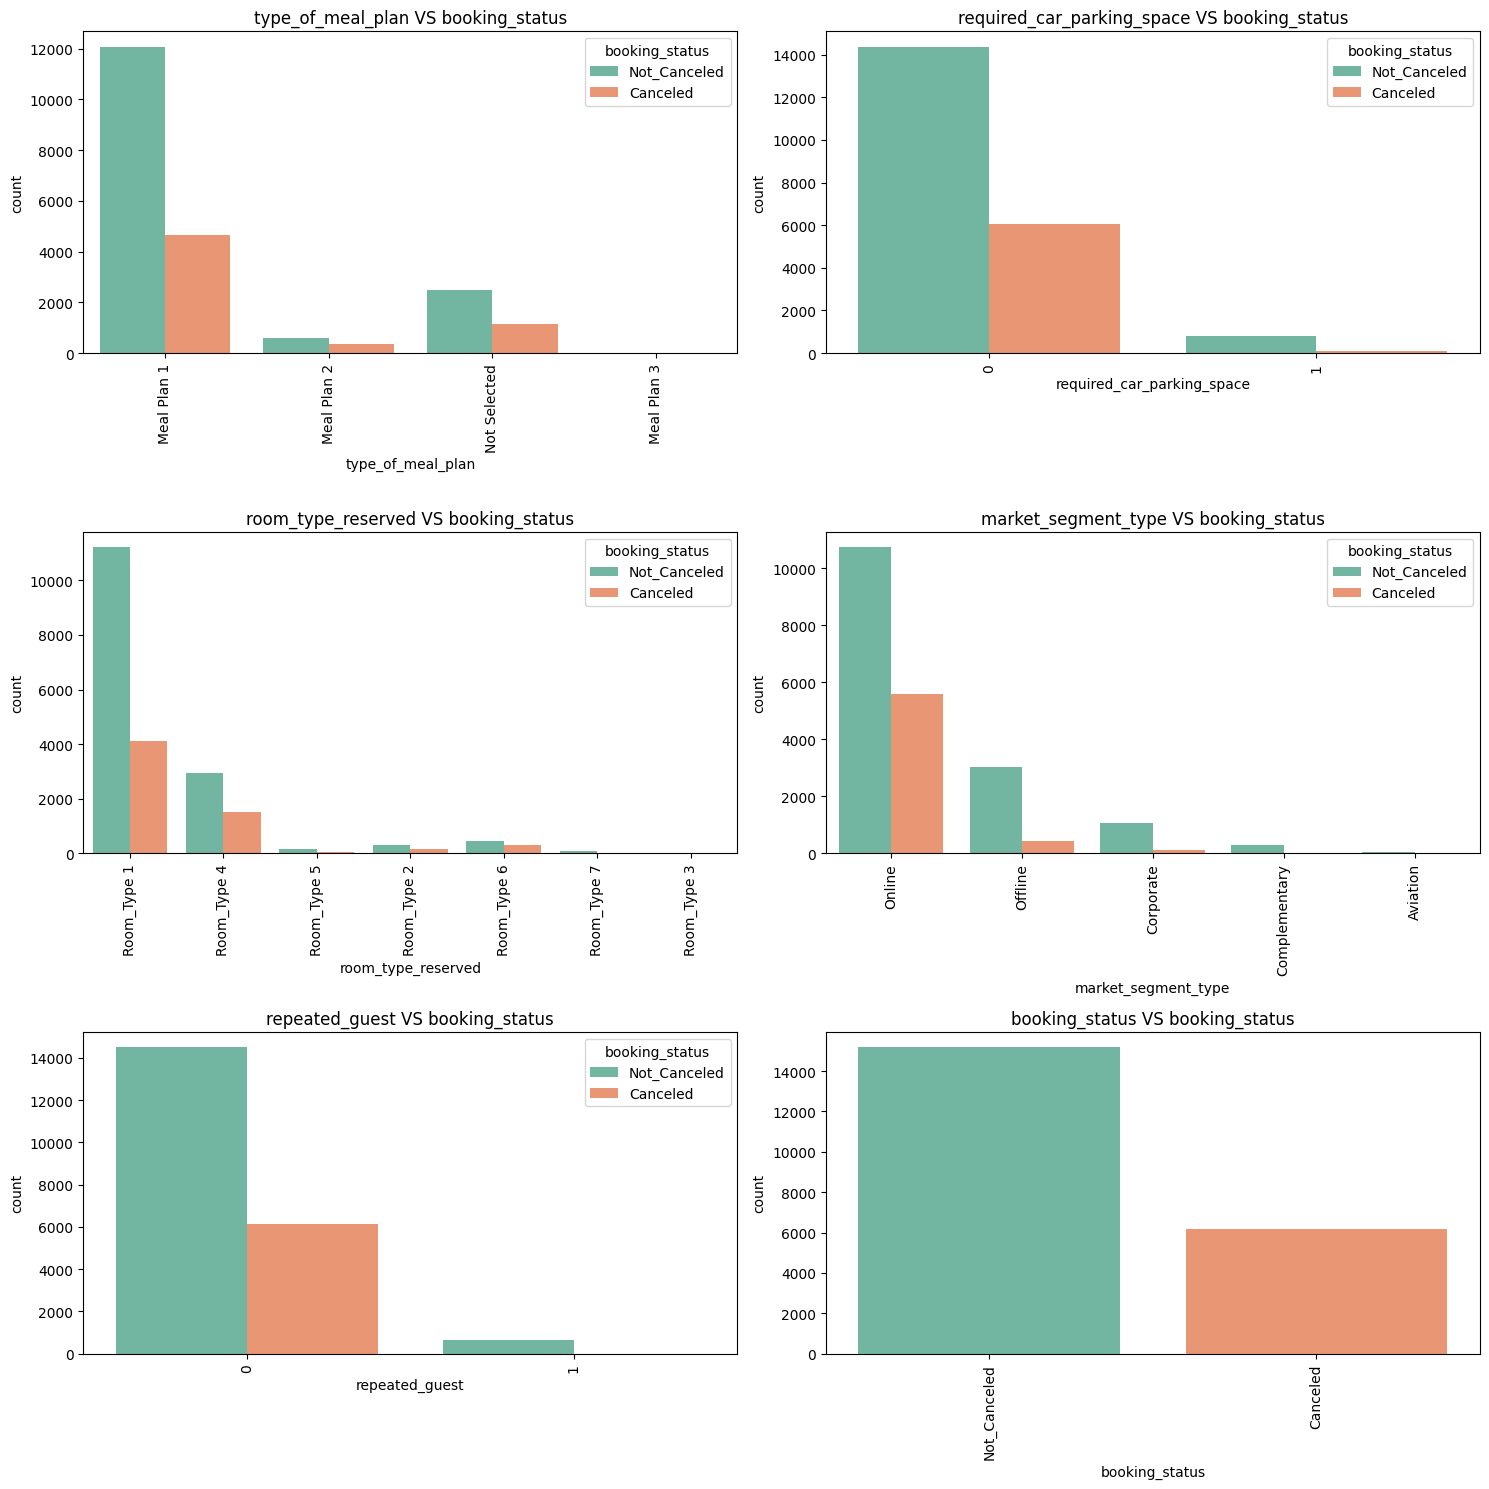

In [44]:
plot_bivaraite_cat(data , 'booking_status' , cat_cols)

#### DATA PROCESSING

In [45]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,1,0,Meal Plan 1,0,Room_Type 1,3,2017,8,23,Online,0,0,0,90.00,3,Not_Canceled
1,2,0,1,2,Meal Plan 1,0,Room_Type 4,9,2018,2,12,Offline,0,0,0,48.67,0,Not_Canceled
2,2,0,2,2,Meal Plan 1,0,Room_Type 1,24,2018,12,25,Online,0,0,0,95.20,1,Not_Canceled
3,2,0,0,3,Meal Plan 1,0,Room_Type 1,23,2018,6,21,Online,0,0,0,127.67,0,Canceled
4,2,1,0,2,Meal Plan 1,0,Room_Type 4,9,2018,9,8,Online,0,0,0,201.50,2,Not_Canceled


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21328 entries, 0 to 29018
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21328 non-null  int64  
 1   no_of_children                        21328 non-null  int64  
 2   no_of_weekend_nights                  21328 non-null  int64  
 3   no_of_week_nights                     21328 non-null  int64  
 4   type_of_meal_plan                     21328 non-null  object 
 5   required_car_parking_space            21328 non-null  int64  
 6   room_type_reserved                    21328 non-null  object 
 7   lead_time                             21328 non-null  int64  
 8   arrival_year                          21328 non-null  int64  
 9   arrival_month                         21328 non-null  int64  
 10  arrival_date                          21328 non-null  int64  
 11  market_segment_type 

In [47]:
##### Label encoding
from sklearn.preprocessing import LabelEncoder

In [48]:
label_encoder = LabelEncoder()

mappings={}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

    mappings[col] = {label:code for label,code in zip(label_encoder.classes_ , label_encoder.transform(label_encoder.classes_))}
    

In [49]:
mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [50]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,1,0,0,0,0,3,2017,8,23,4,0,0,0,90.00,3,1
1,2,0,1,2,0,0,3,9,2018,2,12,3,0,0,0,48.67,0,1
2,2,0,2,2,0,0,0,24,2018,12,25,4,0,0,0,95.20,1,1
3,2,0,0,3,0,0,0,23,2018,6,21,4,0,0,0,127.67,0,0
4,2,1,0,2,0,0,3,9,2018,9,8,4,0,0,0,201.50,2,1


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21328 entries, 0 to 29018
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21328 non-null  int64  
 1   no_of_children                        21328 non-null  int64  
 2   no_of_weekend_nights                  21328 non-null  int64  
 3   no_of_week_nights                     21328 non-null  int64  
 4   type_of_meal_plan                     21328 non-null  int64  
 5   required_car_parking_space            21328 non-null  int64  
 6   room_type_reserved                    21328 non-null  int64  
 7   lead_time                             21328 non-null  int64  
 8   arrival_year                          21328 non-null  int64  
 9   arrival_month                         21328 non-null  int64  
 10  arrival_date                          21328 non-null  int64  
 11  market_segment_type 

In [52]:
### Multicollinearity

In [53]:
!pip install statsmodels

  Using cached statsmodels-0.14.4-cp312-cp312-win_amd64.whl.metadata (9.5 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached statsmodels-0.14.4-cp312-cp312-win_amd64.whl (9.8 MB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
 

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [55]:
X = add_constant(df)

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [56]:
vif_data

,feature,VIF
0,const,4.062951e+07
1,no_of_adults,1.334935e+00
2,no_of_children,1.278657e+00
3,no_of_weekend_nights,1.080022e+00
4,no_of_week_nights,1.134511e+00
5,type_of_meal_plan,1.179220e+00
6,required_car_parking_space,1.033016e+00
7,room_type_reserved,1.568520e+00
8,lead_time,1.411580e+00
9,arrival_year,1.288129e+00


#### Our data dont have any multicollinearity

In [57]:
corr = df.corr()

In [58]:
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.041710,0.090604,0.114990,-0.011542,-0.006018,0.278548,0.157492,0.096062,0.011704,0.024228,0.308165,-0.239027,-0.061310,-0.144040,0.326440,0.154417,-0.096321
no_of_children,-0.041710,1.000000,0.013753,0.012468,-0.104654,0.018526,0.361803,0.006721,0.031737,0.004597,0.022043,0.094068,-0.048034,-0.020327,-0.028981,0.347173,0.098674,-0.061757
no_of_weekend_nights,0.090604,0.013753,1.000000,0.239738,-0.038150,-0.052350,0.031190,0.132834,0.033514,0.012029,0.008311,0.090771,-0.090570,-0.031993,-0.041367,-0.000636,0.017331,-0.074910
no_of_week_nights,0.114990,0.012468,0.239738,1.000000,-0.080651,-0.061138,0.082825,0.220639,0.014098,0.036409,-0.008005,0.115724,-0.117863,-0.032646,-0.057149,0.013326,0.031074,-0.126320
type_of_meal_plan,-0.011542,-0.104654,-0.038150,-0.080651,1.000000,-0.022864,-0.249226,-0.052759,0.094857,0.010581,-0.008743,0.181239,-0.069497,-0.005792,-0.044685,-0.105252,-0.011751,-0.035032
required_car_parking_space,-0.006018,0.018526,-0.052350,-0.061138,-0.022864,1.000000,0.012618,-0.040155,0.005087,-0.009760,-0.005948,-0.045267,0.116547,0.035135,0.069553,0.051270,0.064521,0.085267
room_type_reserved,0.278548,0.361803,0.031190,0.082825,-0.249226,0.012618,1.000000,-0.017083,0.086462,0.001578,0.031492,0.091701,-0.048362,-0.013294,-0.021264,0.493981,0.091643,-0.072369
lead_time,0.157492,0.006721,0.132834,0.220639,-0.052759,-0.040155,-0.017083,1.000000,0.172457,0.139761,0.041915,0.141445,-0.147254,-0.052111,-0.086546,-0.042384,-0.008697,-0.371497
arrival_year,0.096062,0.031737,0.033514,0.014098,0.094857,0.005087,0.086462,0.172457,1.000000,-0.321637,0.018116,0.109662,-0.009603,0.009997,0.025048,0.171045,-0.002675,-0.155543
arrival_month,0.011704,0.004597,0.012029,0.036409,0.010581,-0.009760,0.001578,0.139761,-0.321637,1.000000,-0.017438,-0.016483,-0.010742,-0.046978,-0.011322,0.064291,0.131200,0.009815


<Axes: >

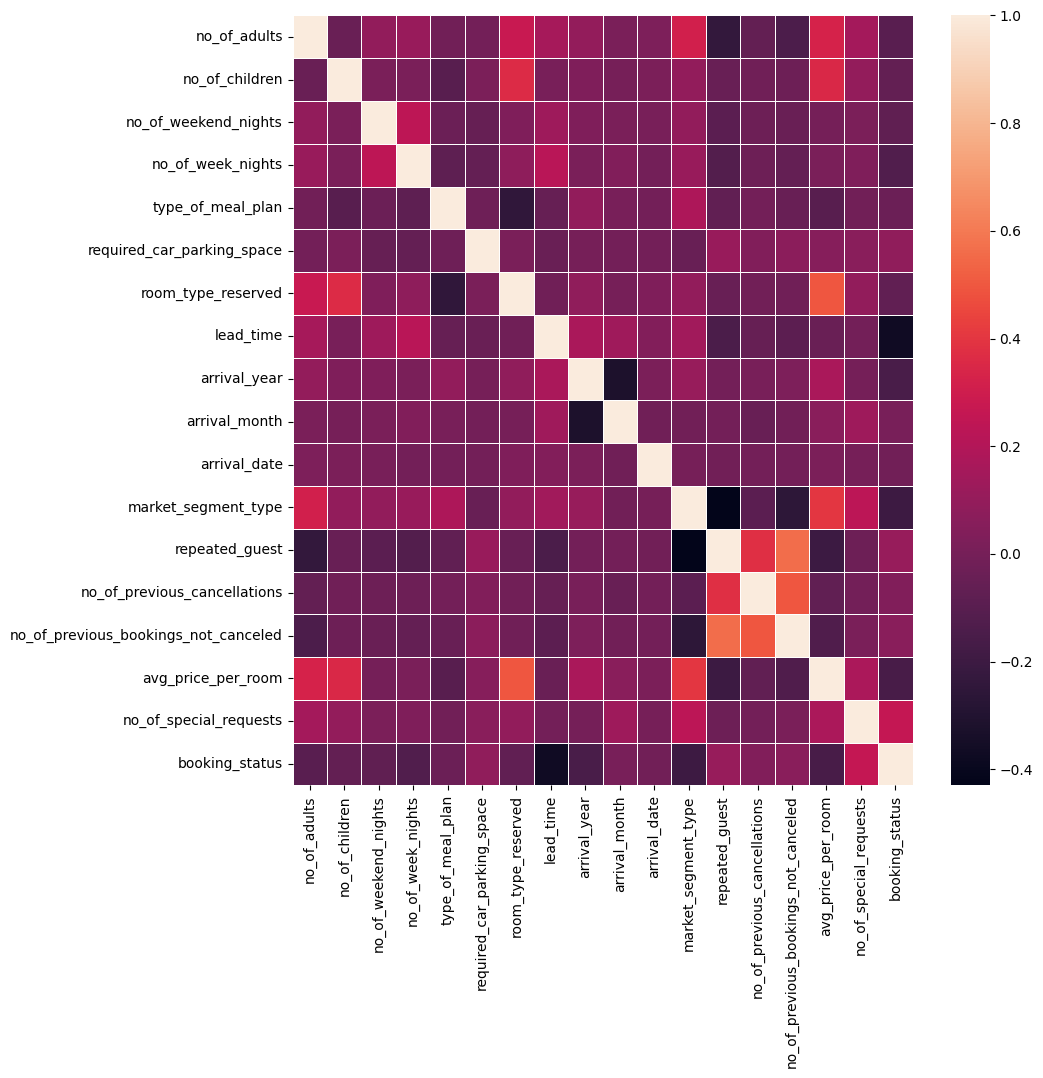

In [59]:
plt.figure(figsize=(10,10))
sns.heatmap(corr , linewidths=0.5)

In [60]:
#### Skewness

In [61]:
skewness  = df.skew()

In [62]:
skewness

no_of_adults                            -0.269723
no_of_children                           4.212876
no_of_weekend_nights                     0.690413
no_of_week_nights                        1.655814
type_of_meal_plan                        1.638384
required_car_parking_space               4.598445
room_type_reserved                       1.378971
lead_time                                1.401160
arrival_year                            -1.935633
arrival_month                           -0.295472
arrival_date                             0.016098
market_segment_type                     -2.359013
repeated_guest                           5.342330
no_of_previous_cancellations            22.323003
no_of_previous_bookings_not_canceled    16.224288
avg_price_per_room                       0.593184
no_of_special_requests                   0.921220
booking_status                          -0.933739
dtype: float64

In [63]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

In [64]:
#### Imablanced Data

In [65]:
df["booking_status"].value_counts()

booking_status
1    15175
0     6153
Name: count, dtype: int64

In [66]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [67]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [ ]:
# !pip install imbalanced-learn


In [74]:
y.value_counts()

booking_status
1    15175
0     6153
Name: count, dtype: int64

In [77]:
from imblearn.over_sampling import SMOTE


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [72]:
smote = SMOTE(random_state=42)

X_res , y_res = smote.fit_resample(X,y)

NameError: name 'SMOTE' is not defined

In [ ]:
y_res

0        1
1        1
2        0
3        1
4        0
        ..
30457    0
30458    0
30459    0
30460    0
30461    0
Name: booking_status, Length: 30462, dtype: int64

In [ ]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [ ]:
balanced_df = pd.DataFrame(X_res , columns=X.columns)
balanced_df["booking_status"] = y_res

In [ ]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [ ]:
balanced_df.shape

(30462, 18)

In [ ]:
df = balanced_df.copy()

In [ ]:
df.shape

(30462, 18)

In [ ]:
#### Feature Selection

In [ ]:
len(df.columns)

18

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [ ]:
model =  RandomForestClassifier(random_state=42)
model.fit(X,y)

RandomForestClassifier(random_state=42)

In [ ]:
feature_importance = model.feature_importances_

In [ ]:
feature_importance_df = pd.DataFrame({
    'feature':X.columns,
    'importance':feature_importance
})

In [ ]:
top_features_importance_df = feature_importance_df.sort_values(by="importance" , ascending=False)

In [ ]:
top_10_features = top_features_importance_df["feature"].head(10).values

top_10_df = df[top_10_features.tolist() + ["booking_status"]]

In [ ]:
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.00,10,17,4,1,2,0,0,1
1,98,2,121.50,7,16,4,1,1,0,0,1
2,433,0,70.00,9,8,3,3,0,0,0,0
3,195,0,72.25,8,8,3,5,2,0,0,1
4,188,0,130.00,6,15,3,2,0,0,0,0


In [ ]:
len(top_10_df.columns)

11

In [ ]:
df = top_10_df.copy()

### MODEL SELECTION

In [ ]:
!pip install xgboost lightgbm

  Using cached xgboost-2.1.3-py3-none-win_amd64.whl.metadata (2.1 kB)
  Using cached lightgbm-4.5.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached xgboost-2.1.3-py3-none-win_amd64.whl (124.9 MB)
Using cached lightgbm-4.5.0-py3-none-win_amd64.whl (1.4 MB)



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [ ]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [ ]:
classifiers = {
    "Random Forest" : RandomForestClassifier(random_state=42),
    "LogisticRegression" : LogisticRegression(random_state=42),
    "Gradient Boosting" : GradientBoostingClassifier(random_state=42),
    "Suuport vector classifier" : SVC(random_state=42),
    "Decsion Tree" : DecisionTreeClassifier(random_state=42),
    "KNN" : KNeighborsClassifier(),
    "Naive Bayes" : GaussianNB(),
    "XGboost" : XGBClassifier(random_state=42),
    "Adaboost" : AdaBoostClassifier(random_state=42),
    "LGBM" : LGBMClassifier(random_state=42) 
}

In [ ]:
metrics = {
    "Model" : [],
    "Accuracy" : [],
    "Precision" : [],
    "Recall" : [],
    "F1 Score" : []
}

In [ ]:
for model_name,classifier in classifiers.items():
    classifier.fit(X_train,y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)


In [ ]:
metrics_df= pd.DataFrame(metrics)

In [ ]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.890694,0.894357,0.887948,0.891141
1,LogisticRegression,0.774003,0.804168,0.728990,0.764736
2,Gradient Boosting,0.836698,0.820711,0.864821,0.842189
3,Suuport vector classifier,0.720499,0.729902,0.706840,0.718186
4,Decsion Tree,0.834564,0.842297,0.826384,0.834265
5,KNN,0.779419,0.856907,0.674919,0.755102
6,Naive Bayes,0.773511,0.803738,0.728339,0.764183
7,XGboost,0.874282,0.872093,0.879479,0.875770
8,Adaboost,0.805186,0.802053,0.814332,0.808146
9,LGBM,0.865419,0.852886,0.885668,0.868968


In [ ]:
##### TRAIN OUR RF MODEL

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
X = df.drop(columns='booking_status')
y = df["booking_status"]

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
params_dist={
    'n_estimators' : randint(100,500),
    'max_depth' : randint(10,50),
    'min_samples_split': randint(2,10),
    'min_samples_leaf' : randint(1,5),
    'bootstrap' : [True , False] 
}

In [ ]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

In [ ]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.9s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   5.4s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.3s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.9s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.2s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   8.1s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   8.1s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   8.0s
[CV]

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002145DD5BE00>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002147FEDA1B0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002147FEDB5F0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021456680BC0>},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [ ]:
best_rf_model = random_search.best_estimator_

In [ ]:
y_pred = best_rf_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [ ]:
accuracy

0.8893812571803709

In [ ]:
precision

0.88745148771022

In [ ]:
recall

0.8938110749185668

In [ ]:
f1

0.8906199285946121

In [ ]:
### Save this model

In [ ]:
import joblib

In [ ]:
joblib.dump(best_rf_model,"random_forest.pkl")

['random_forest.pkl']

In [ ]:
loaded_model=joblib.load("random_forest.pkl")

In [ ]:
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
4157,190,1,93.5,9,8,4,5,2,0,0


In [ ]:
new_data = np.array([190,1 ,	93.5,	9	,8,	4,	5,	2,	0,	0]).reshape(1,-1)

In [ ]:
predictions=loaded_model.predict(new_data)

In [ ]:
predictions

array([1])